In [109]:
#import dependencies 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

In [110]:
# csv's we want to look at
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

In [111]:
# make data frames
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [112]:
# checking data in city_data_df --------------------------------------------------------
city_data_df.count() #everything seems in order
#get the columns and the rows that are not null
city_data_df.isnull().sum() # looks good
#get the data type for each column
city_data_df.dtypes
# get the unique calues of the type of city
city_data_df["type"].unique()
#get the total types  cities
sum(city_data_df["type"] == "Urban") # 66
sum(city_data_df["type"] == "Suburban") #36
sum(city_data_df["type"] == "Rural") #18

18

In [113]:
# checking data in ride_data_df --------------------------------------------------------
# getting columns and rows that are not null
ride_data_df.count() #looks good
# getting columns and the rows that are not null
ride_data_df.isnull().sum() #looks good
#get the data types
ride_data_df.dtypes
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [114]:
# merging the data frames on city
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [115]:
# USING FILTERS creat the Urban City DataFrame
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [116]:
# USING FILTERS create the Suburban DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

In [117]:
# USING FILTERS create the rural DataFrame
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [118]:
# getting ride counts
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [119]:
# getting the average far for each city
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [120]:
# getting average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

<function matplotlib.pyplot.legend(*args, **kwargs)>

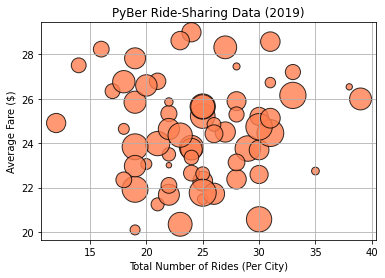

In [121]:
#building scatter plot of Urban Cities
plt.scatter(urban_ride_count,urban_avg_fare, 
            s = 10 * urban_driver_count, c = "coral",
           edgecolor = "black", linewidths = 1,
           alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# add legend
plt.legend

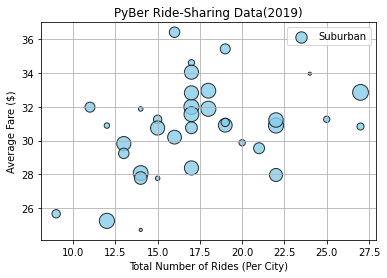

In [122]:
# Suburban Scatter Plot
plt.scatter(suburban_ride_count, 
           suburban_avg_fare,
           s = 10* suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths = 1,
           alpha = 0.8, label = "Suburban")
plt.title("PyBer Ride-Sharing Data(2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#add legend
plt.legend()

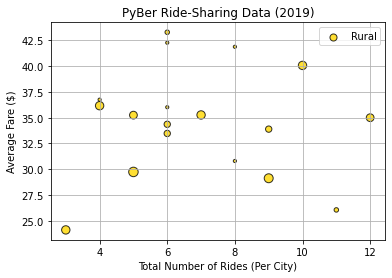

In [123]:
# Rural Scatter Plot
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s= 10* rural_driver_count, c= "gold",
           edgecolor = "black", linewidths = 1,
           alpha = .8, label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# add legend
plt.legend()

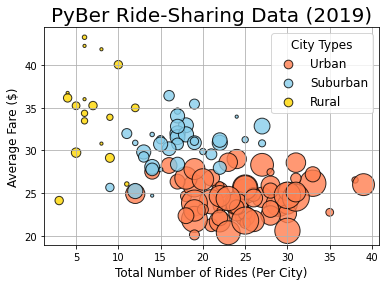

<Figure size 432x288 with 0 Axes>

In [124]:
# add scatter charts for each type of city
#urban
plt.scatter(urban_ride_count,urban_avg_fare, 
            s = 10 * urban_driver_count, c = "coral",
           edgecolor = "black", linewidths = 1,
           alpha = 0.8, label = "Urban")
#suburban
plt.scatter(suburban_ride_count, 
           suburban_avg_fare,
           s = 10* suburban_driver_count, c="skyblue",
           edgecolor="black", linewidths = 1,
           alpha = 0.8, label = "Suburban")
#Rural
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s= 10* rural_driver_count, c= "gold",
           edgecolor = "black", linewidths = 1,
           alpha = .8, label = "Rural")

# adding other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare ($)", fontsize = 12)
plt.xlabel("Total Number of Rides (Per City)", fontsize = 12)
plt.grid(True)
#creating the legend
lgnd = plt.legend(fontsize="12",mode = "Expanded",
                 scatterpoints = 1, loc="best", title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.show()
# save the figure to analysis
plt.savefig("analysis/Fig1.png")


In [125]:
# save the figure to analysis
plt.savefig("analysis/Fig1.png")

<Figure size 432x288 with 0 Axes>

In [126]:
# Statistics Sections --------------------------------------------------------
urban_cities_df.describe()
rural_ride_count.describe()

#calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2),round(suburban_ride_count.mean(),2),round(rural_ride_count.mean(),2)
# calculating median
round(urban_ride_count.median(),2),round(suburban_ride_count.median(),2),round(rural_ride_count.median(),2)
#mode of the ride count for the urban cities
urban_ride_count.mode()
#mode of the ride count for the suburban cities
suburban_ride_count.mode()
#mode for rural cities
rural_ride_count.mode()

0    6
dtype: int64

In [127]:
# calculating the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [128]:
# calculating the measures of central tendency for the ride count for the Suburban cities
mean_subrban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_subrban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban trips is {median_suburban_ride_count:.2f}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_suburban_ride_count}.")
sts.mode(rural_ride_count)

The mean for the ride counts for urban trips is 17.36.
The median for the ride counts for urban trips is 17.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([17]), count=array([7])).


ModeResult(mode=array([6]), count=array([5]))

In [129]:
# calculating the measures of central tendency for the ride count for the Suburban cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban trips is {median_rural_ride_count:.2f}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_rural_ride_count}.")
sts.mode(rural_ride_count)

The mean for the ride counts for urban trips is 6.94.
The median for the ride counts for urban trips is 6.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


ModeResult(mode=array([6]), count=array([5]))

In [130]:
# get the fares for the urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [131]:
#get the fares for the suburban cities
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [132]:
#get the fares for the rural cities
rural_fares = rural_cities_df["fare"]
rural_fares.head()

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [133]:
# get the driver count data from the urban cities
urban_drivers = urban_cities_df["driver_count"]
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

suburban_drivers = suburban_cities_df["driver_count"]
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

rural_drivers = rural_cities_df["driver_count"]
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_suburban_drivers = sts.mode(rural_drivers)

print(mean_suburban_drivers)

13.712


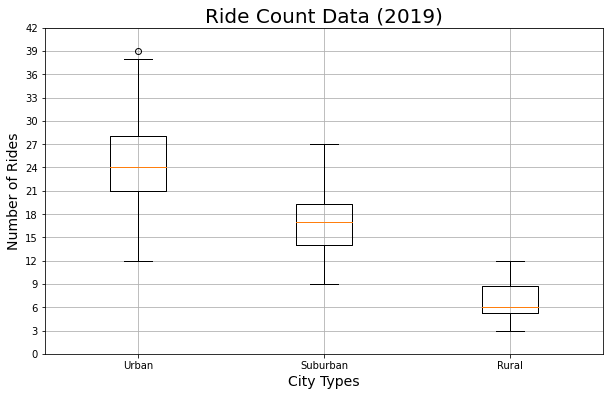

<Figure size 432x288 with 0 Axes>

In [147]:
# box and whiskers plot for Ride Count Data
x_labels = ["Urban","Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(ride_count_data, labels = x_labels)
# add the title, y-axis label and grid
ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides",fontsize=14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0,45, step =3.0))
ax.grid()
plt.show()
plt.savefig("analysis/ Fig2.png", facecolor= 'w', edgecolor = 'w')

In [135]:
# get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(urban_city_outlier)

West Angela


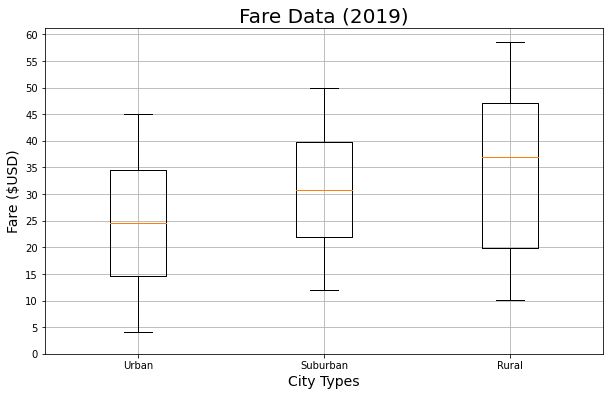

<Figure size 432x288 with 0 Axes>

In [150]:
# Box and whiskers for Fare Data
x_labels = ["Urban","Suburban","Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(fare_data, labels = x_labels)
# add the title, y-axis label and grid
ax.set_title("Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)",fontsize=14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0,61, step =5.0))
ax.grid()
plt.show()
plt.savefig("analysis/ Fig3.png", edgecolor = 'w')

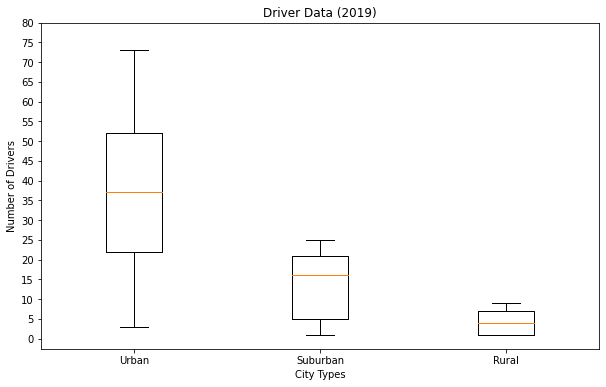

<Figure size 432x288 with 0 Axes>

In [152]:
# Box and whiskers for driver count
x_labels = ["Urban", "Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(driver_data, labels = x_labels)
ax.set_title("Driver Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_xlabel("City Types")
ax.set_yticks(np.arange(0,81, step = 5.0))
plt.show()
plt.savefig("analysis/Fig4.png", edgecolor = 'w')

In [154]:
# pie charts -----
#get the sum of the fares for 
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

In [155]:
#get the sum of all the fares
total_fares = pyber_data_df["fare"].sum()

In [157]:
# percentage of fare for each city type
type_percents = 100 * sum_fares_by_type / total_fares
#expertmode
type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

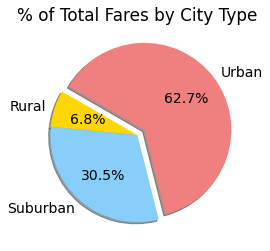

In [164]:
# build the percentage of fares by city type pie chart.
#import mpl to change the plot configurations using rcParams
import matplotlib as mpl
plt.pie(type_percents, 
        labels = ["Rural","Suburban", "Urban"],
        colors=["gold","lightskyblue","lightcoral"],
       explode = [0,0,0.1], autopct = "%1.1f%%",
       shadow = True, startangle = 150)
mpl.rcParams["font.size"] = 14
plt.title("% of Total Fares by City Type")
plt.savefig("analysis/fig5.png")
plt.show

In [165]:
# Calculate the percentage of rides for each city type.
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

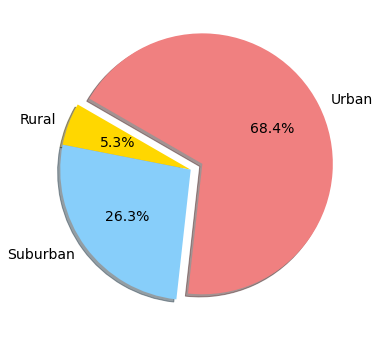

In [167]:
#build percentager of rides by city type pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
       labels=["Rural","Suburban","Urban"],
       colors = ["gold","lightskyblue","lightcoral"],
       explode = [0,0,0.1],
       autopct = "%1.1f%%",
       shadow = True, startangle =150)
#change font from 10 to 14
mpl.rcParams["font.size"] = 14
plt.savefig("analysis/fig6.png")
plt.show()

In [170]:
# calculating driver percentages
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()

In [ ]:
# driver % pie chart
plt.subplots(figsize=(10,6))
plt.pie(driver_percents,
       labels = ["Rural","Suburban","Urban"],
       colors = ["gold","lightskyblue","lightcoral"],
        explode = [0,0,0.1]
       autopct = "%1.1f%%",
       shadow = True, startangle = 165)
plt.title(% of Total Drivers by City Type)